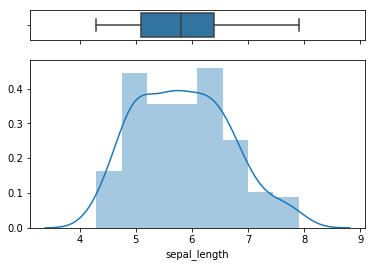

In [54]:
# Import library and dataset
from scipy import special
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')


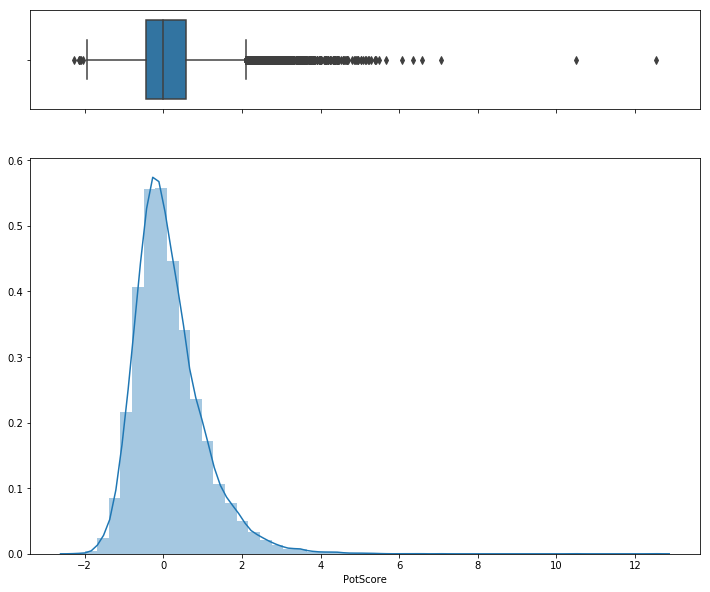

In [69]:
# Import library and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/blaze/Desktop/UTIL/University/[Collec.]/Protein Design/[Protein Sequence Evolution]/Tests/PotScore by Residue/res-A-PotScore.csv')

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=[12, 10])
 
# Add a graph in each part
sns.boxplot(df["PotScore"], ax=ax_box)
sns.distplot(df["PotScore"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

#save to file
plt.savefig("/Users/blaze/Desktop/output.png")


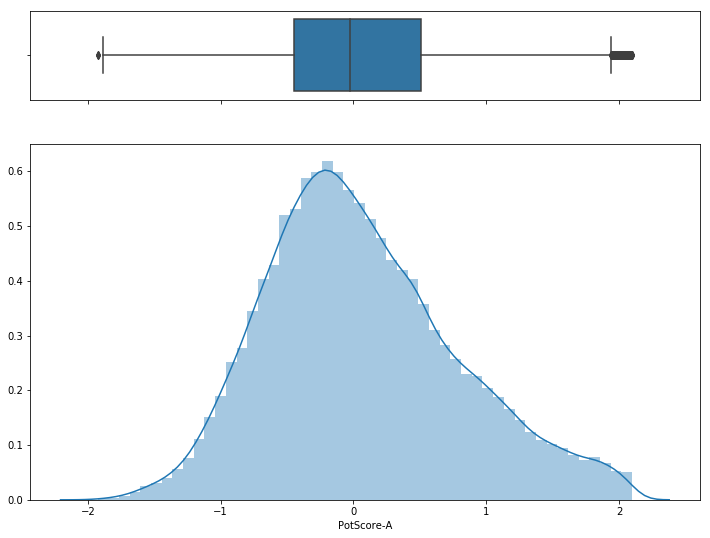

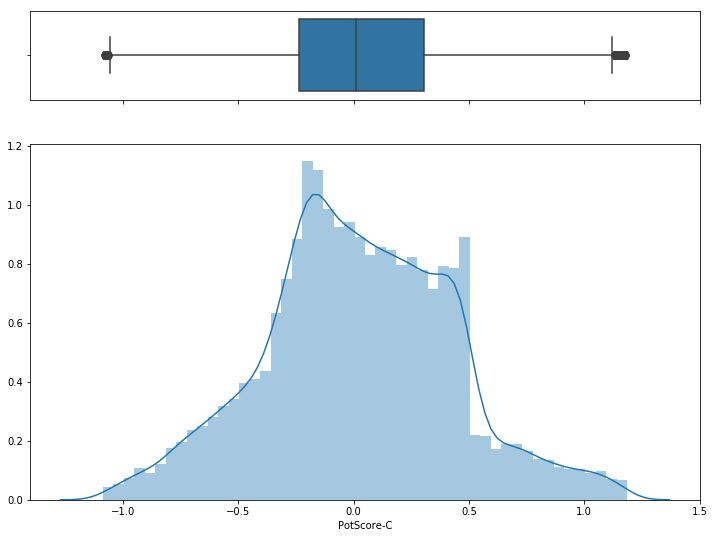

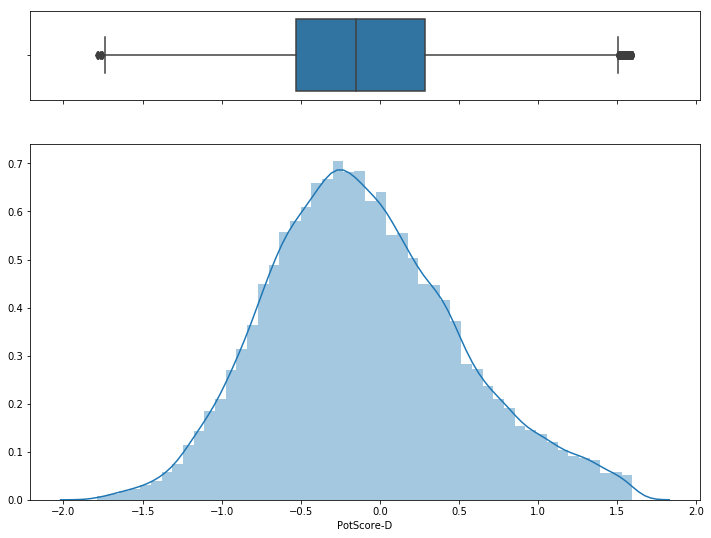

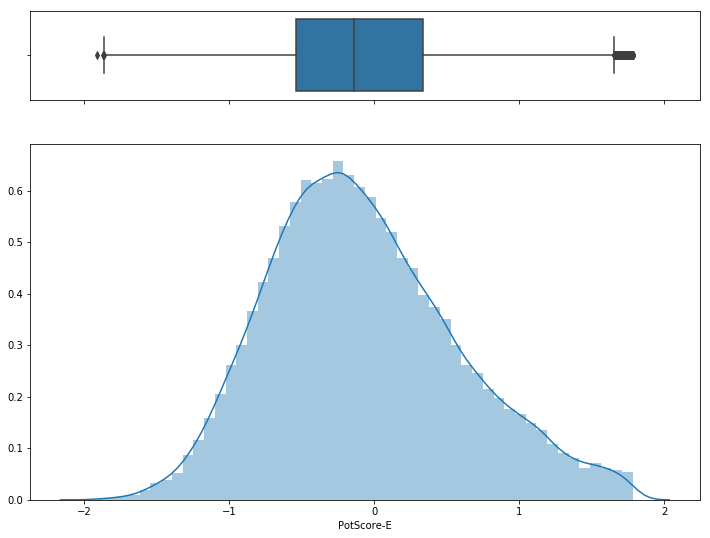

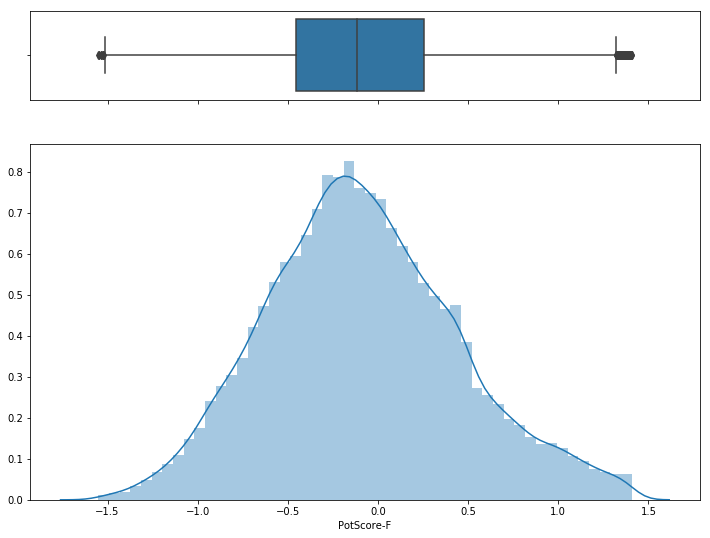

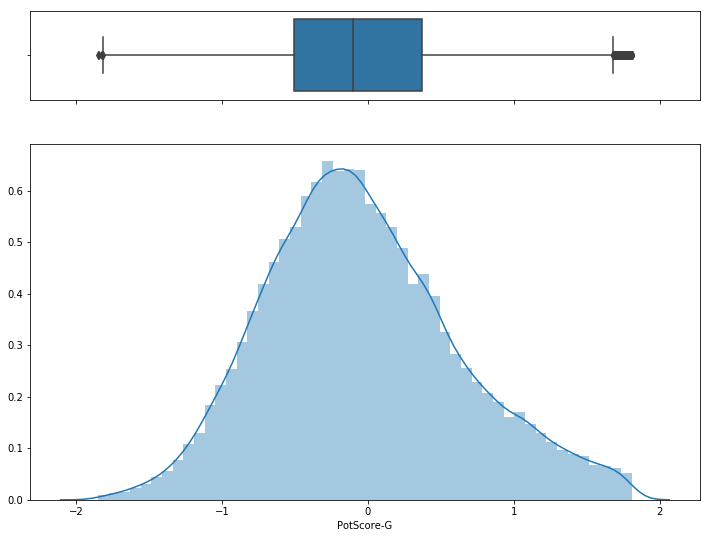

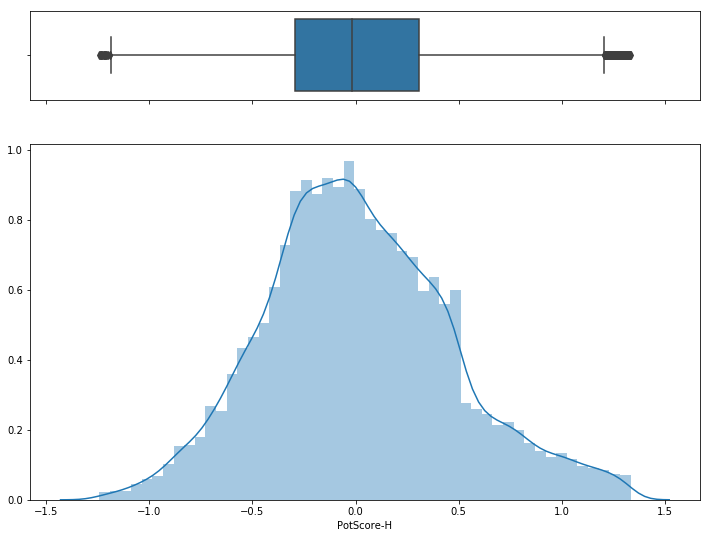

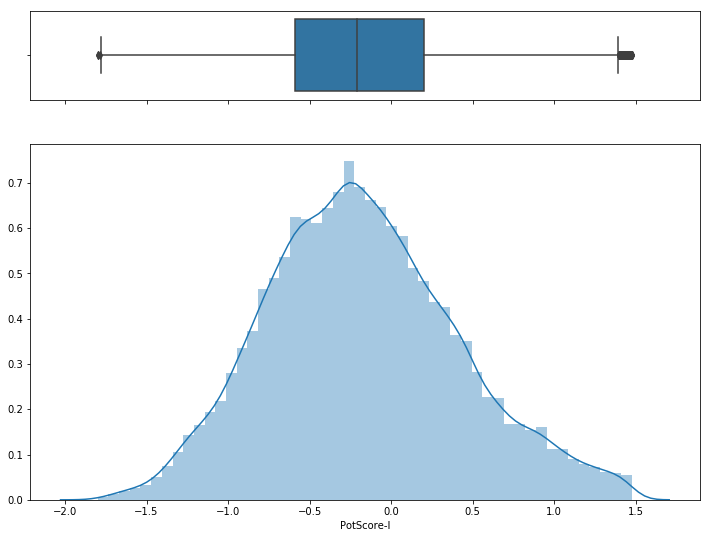

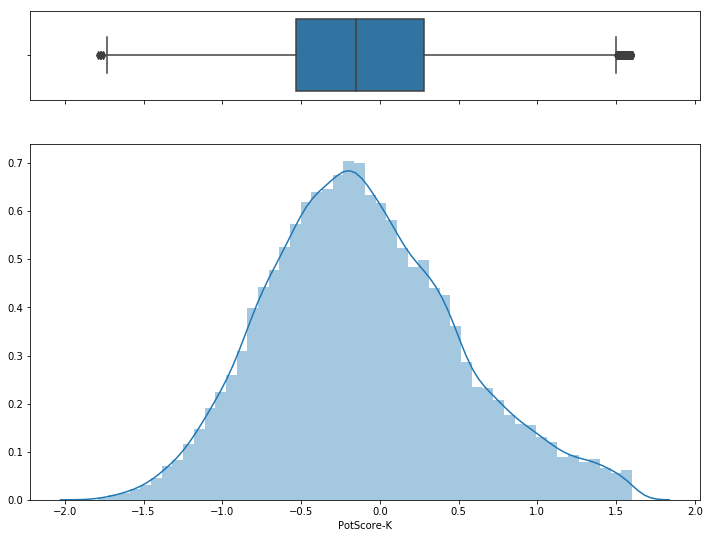

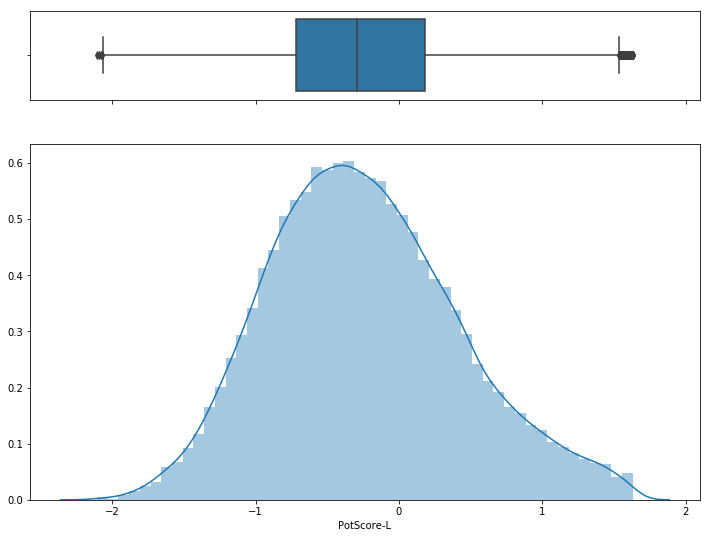

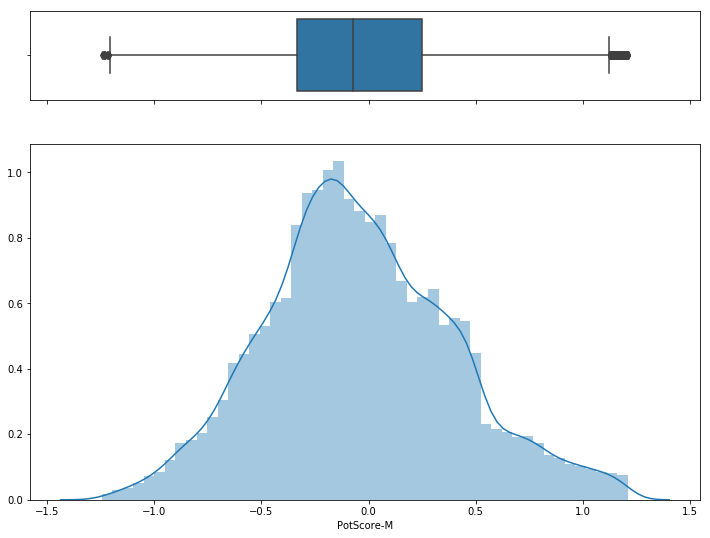

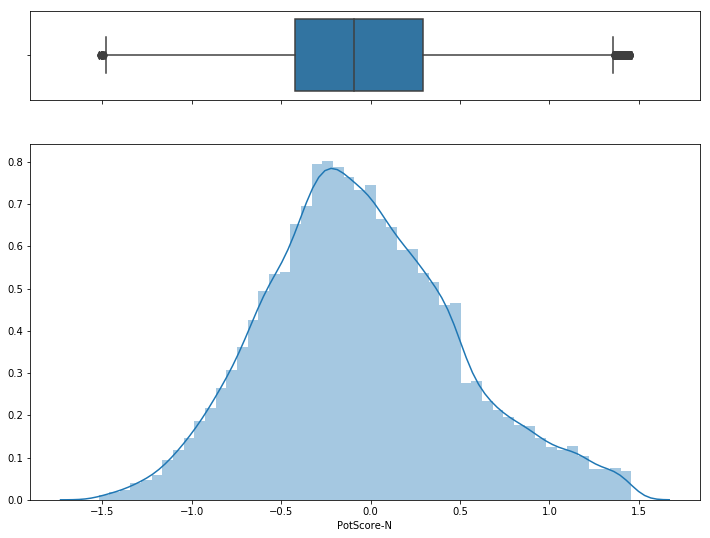

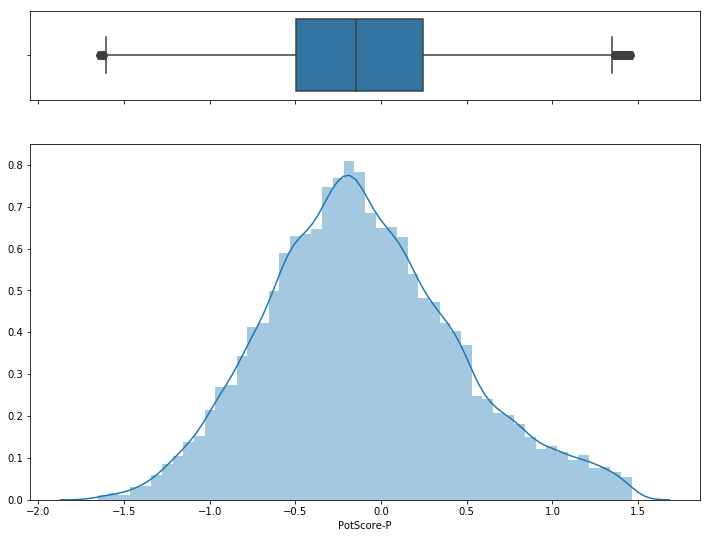

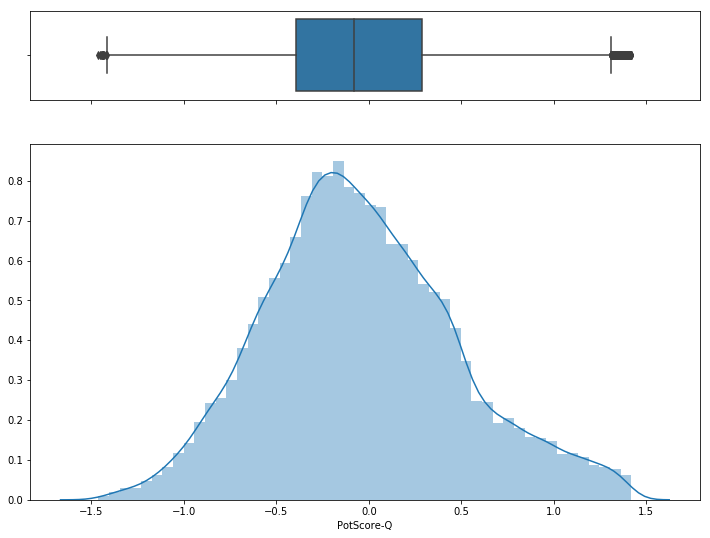

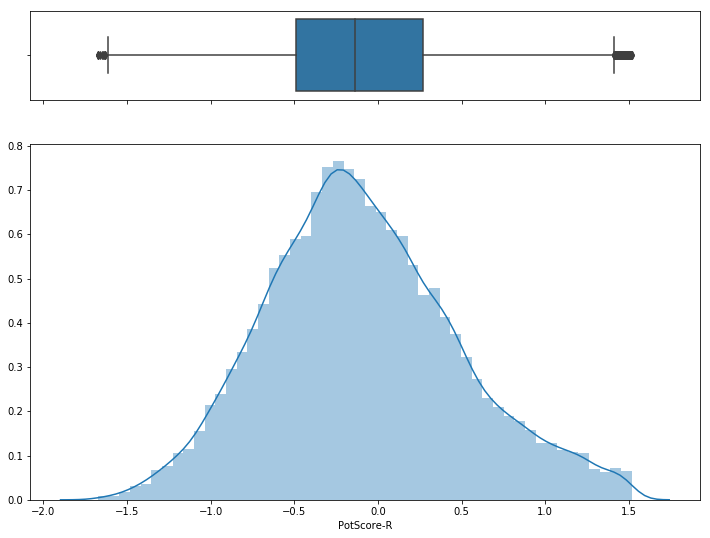

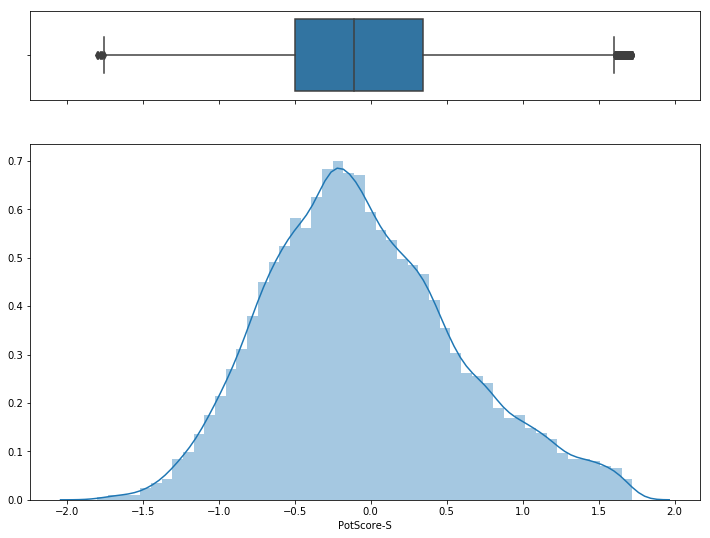

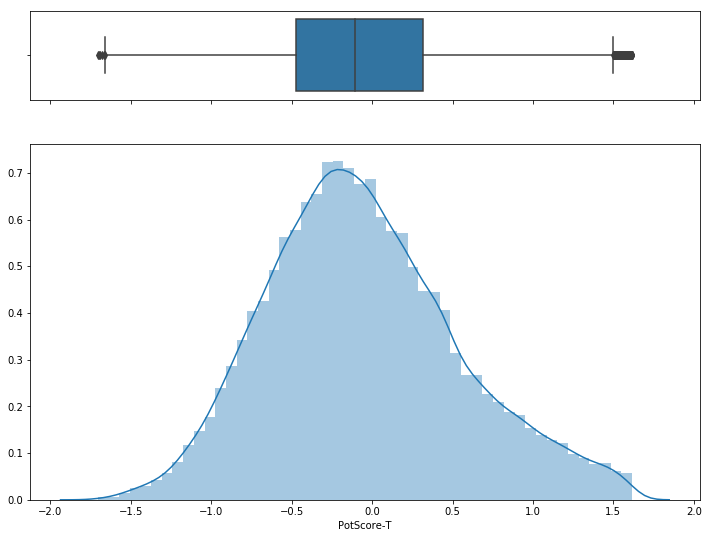

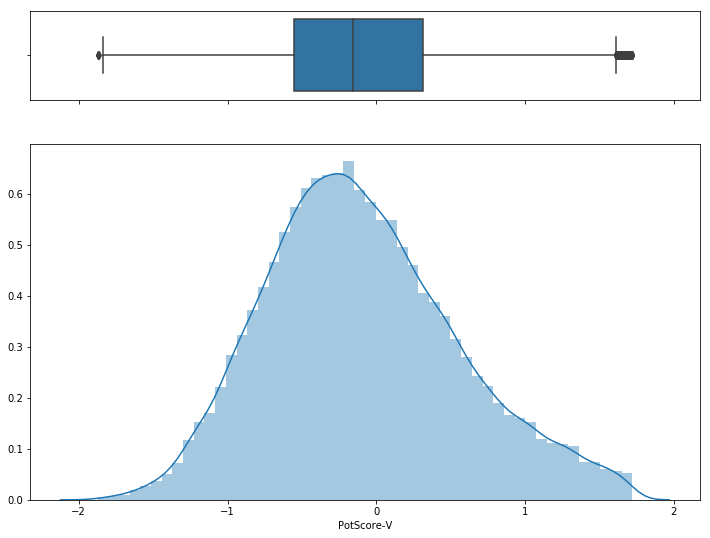

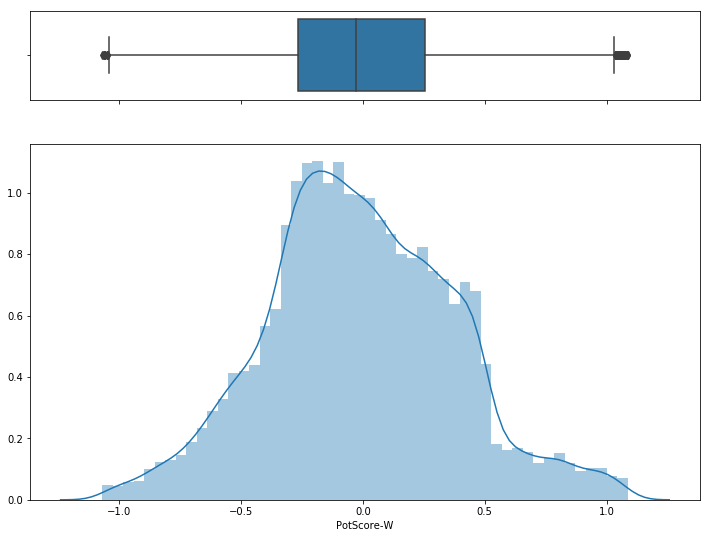

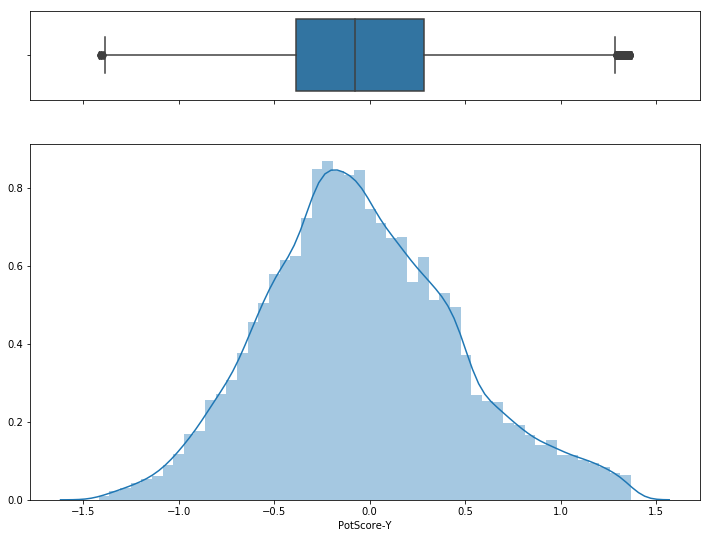

In [86]:
# Import library and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from os import getcwd, listdir
from os.path import join


def file_basename(file):
    return Path(file).resolve().stem

def to_Dataframe(file, col_name):
    with open(file) as input_file:
        return pd.DataFrame({col_name: [float(line) for line in input_file]})

def plot_histogram(file, save=False, dim=[12, 9]):
    name = file_basename(file)
    df = to_Dataframe(file, name)

    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=dim)
 
    # Add a graph in each part
    sns.boxplot(df[list(df)[0]], ax=ax_box)
    sns.distplot(df[list(df)[0]], ax=ax_hist)
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    #save to file
    if save:
        plt.savefig("%s.png" % name)
    

directory = '/Users/blaze/Desktop/UTIL/University/[Collec.]/Protein Design/[Protein Sequence Evolution]/Tests/PotScore by Residue - Trimmed/';

for file in listdir(directory):
    if file.endswith(".txt"):
        plot_histogram(join(directory, file), True)

In [49]:
def read_dataset(filepath):
    with open(filepath) as input_file:
        return [line.rstrip() for line in input_file]

    
def consensus(cluster):
    consen = ''
    for i in range(len(cluster[0])):
        counter = {}
        for entry in cluster:
            if entry[i] == '-':
                continue;
            if entry[i] in counter:
                counter[entry[i]] += 1;
            else:
                counter[entry[i]] = 1;               
        consen += max(counter.keys(), key=(lambda x: counter[x]))
    return consen

cls = read_dataset('/Users/blaze/Downloads/Telegram Desktop/exp0-m-AT.txt')
consensus(cls)

'aataattaatttttatttattaaaaattattataaataaattattaatatataattaattttattttttaattttttttttaaattaaatatattaaaat'

In [53]:
from random import choice

C1=''.join(choice('at') for i in range(100))
C2=''.join(choice('at') for i in range(100))

def read_dataset(filepath):
   with open(filepath) as input_file:
       return [line.rstrip() for line in input_file]

Cluster1=[]
Cluster2=[]

def distance(s1):
   dis1=0
   dis2=0
   for seq in range(100):
       if (C1[seq]!=s1[seq])and((C1[seq]!='-')and(s1[seq]!='-')):
           dis1+=1
       if (C2[seq]!=s1[seq])and((C2[seq]!='-')and(s1[seq]!='-')):
           dis2+=1
   return dis1,dis2

def append_cluster(dist,s1):
   if dist[0]<dist[1]:
       Cluster1.append(s1)
   else:
       Cluster2.append(s1)
       
def consensus(cluster):
    consen = ''
    le = len(cluster[0]);
    print("len %d" % le);
    for i in range(len(cluster[0])):
        print("new i %d" % i)
        counter = {}
        for entry in cluster:
            print("%d i charr %s" % (i, entry[i]));
            if entry[i] == '-':
                continue;
            print("%d ii charr %s" % (i, entry[i]));
            if entry[i] in counter:
                counter[entry[i]] += 1;
            else:
                counter[entry[i]] = 1;
        print(counter)
        consen += max(counter.keys(), key=(lambda x: counter[x]))
    return consen
       
def check(cls):
   i=0
   for index in cls:
       append_cluster(distance(cls[i]),cls[i])
       i+=1

def sum_of_distance(cls,numi):
   i=0
   if numi==1:
       for index in Cluster1:
           dist=distance(Cluster1[i])
           res+=dist[0]
   if numi==2:
       for index in Cluster2:
           dist=distance(Cluster2[i])
           res+=dist[0]
   return res
   
def HC(cls):
   check(cls)
   C1=consensus(Cluster1)
   C2=consensus(Cluster2)
   while sum_of_distance(cls,1)>0 or sum_of_distance(cls,2)>0:
       check(cls)
       C1=consensus(Cluster1)
       C2=consensus(Cluster2)
   return "Successful"
   

       
       
     
print(distance(cls[0]))
cls = read_dataset('/Users/blaze/Downloads/Telegram Desktop/exp0-m-AT.txt')
for i in cls:
    print(i)
#check(cls)
consensus(cls)

(2, 2)
aataatt---------------------------------------------------------------------------------------------
aataa-----------------------------------------------------------------------------------------------
aata------------------------------------------------------------------------------------------------
----attaatt--------------------------------------------------------------------ttaaat--------tta----
-----tta----------------------------taaatta----------------------ttttaa----------------------------t
-------aatt--------------------------------tta------------------------------------------------------
--------attttta-------------------------------------------------------------------------------------
-----------tttattt------aattat----------------------------------------------------------------------
-----------tttattt----------------------------------------------------------------------------------
---------------ttt----------------------------------------ttt-----------------------

21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr a
21 ii charr a
21 i charr -
21 i charr -
21 i charr a
21 ii charr a
21 i charr a
21 ii charr a
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
21 i charr -
{'a': 6}
new i 22
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr -
22 i charr a
22 ii charr a
22 i charr a
22 

40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr a
40 ii charr a
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr a
40 ii charr a
40 i charr -
40 i charr -
40 i charr a
40 ii charr a
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
40 i charr -
{'t': 3, 'a': 3}
new i 41
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr t
41 ii charr t
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr t
41 ii charr t
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr t
41 ii charr t
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i charr -
41 i c

58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr a
58 ii charr a
58 i charr a
58 ii charr a
58 i charr a
58 ii charr a
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
58 i charr -
{'t': 3, 'a': 3}
new i 59
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr t
59 ii charr t
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr t
59 ii charr t
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr -
59 i charr t
59 ii charr t
59 i c

74 i charr -
74 i charr -
74 i charr a
74 ii charr a
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr a
74 ii charr a
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr a
74 ii charr a
74 i charr -
74 i charr -
74 i charr -
74 i charr -
74 i charr -
{'t': 3, 'a': 3}
new i 75
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr t
75 ii charr t
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i charr -
75 i cha

90 ii charr a
90 i charr a
90 ii charr a
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr t
90 ii charr t
90 i charr -
90 i charr -
90 i charr t
90 ii charr t
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr -
90 i charr t
90 ii charr t
90 i charr -
90 i charr -
{'a': 3, 't': 3}
new i 91
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr t
91 ii charr t
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i charr -
91 i c

'aataattaatttttatttattaaaaattattataaataaattattaatatataattaattttattttttaattttttttttaaattaaatatattaaaat'